In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_validate,cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from scipy.stats import sem
from sklearn import tree
import warnings
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve
import xgboost

warnings.filterwarnings("ignore")
%matplotlib inline

/opt/homebrew/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
notebook_path = os.path.abspath("project.ipynb")
path = os.path.join(os.path.dirname(notebook_path), "data.csv")
data = pd.read_csv(path)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2210 entries, 0 to 2209
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   frame_count  2210 non-null   int64  
 1   eye          2210 non-null   float64
 2   mouth        2210 non-null   float64
 3   area_eye     2210 non-null   float64
 4   area_mouth   2210 non-null   float64
 5   pupil        2210 non-null   float64
 6   label        2210 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 121.0 KB


In [5]:
data.head()

,frame_count,eye,mouth,area_eye,area_mouth,pupil,label
0,0,0.350005,0.303615,348.938574,1203.765846,0.621524,1
1,1,0.277128,0.311054,284.864787,1167.540936,0.525564,1
2,2,0.275606,0.308282,290.253677,1109.770542,0.529198,1
3,3,0.277434,0.302749,291.007944,1125.450366,0.529973,1
4,4,0.282145,0.303636,292.338963,1127.130360,0.531980,1


In [11]:
data.columns

Index(['frame_count', 'eye', 'mouth', 'perimeter', 'area', 'pupil', 'label'], dtype='object')

In [6]:
data = data.drop(columns=['frame_count'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2210 entries, 0 to 2209
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   eye         2210 non-null   float64
 1   mouth       2210 non-null   float64
 2   area_eye    2210 non-null   float64
 3   area_mouth  2210 non-null   float64
 4   pupil       2210 non-null   float64
 5   label       2210 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 103.7 KB


In [8]:
df_num = data.select_dtypes(include=[np.number])
df_cat = data.select_dtypes(include=[object])
num_cols = df_num.columns.values[:-1]
cat_cols = df_cat.columns.values

# Удаление пропусков

In [9]:
data.describe()

,eye,mouth,area_eye,area_mouth,pupil,label
count,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000
mean,0.267745,0.327804,192.715887,923.668058,0.528909,0.500000
std,0.117250,0.114789,52.003240,331.076506,0.084364,0.500113
min,0.022200,0.159933,68.062243,202.293923,0.293084,0.000000
25%,0.191755,0.282886,161.638682,768.695219,0.469933,0.000000
50%,0.316851,0.300661,192.609346,830.215952,0.552150,0.500000
75%,0.354149,0.319780,218.054582,1061.765875,0.591435,1.000000
max,0.512781,1.135788,371.353130,3170.186798,0.745899,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2210 entries, 0 to 2209
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   eye         2210 non-null   float64
 1   mouth       2210 non-null   float64
 2   area_eye    2210 non-null   float64
 3   area_mouth  2210 non-null   float64
 4   pupil       2210 non-null   float64
 5   label       2210 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 103.7 KB


In [11]:
def about_data(df):
    total_missing_values = df.isnull().sum().sort_values(ascending=False).reset_index()
    total_missing_values = total_missing_values.rename(columns={'index':'columns',0:'total missing'})
    total_missing_values['ration of missing'] = total_missing_values['total missing']/len(df)
    return total_missing_values


In [12]:
print(data.shape)
about_data(data)

(2210, 6)


,columns,total missing,ration of missing
0,eye,0,0.0
1,mouth,0,0.0
2,area_eye,0,0.0
3,area_mouth,0,0.0
4,pupil,0,0.0
5,label,0,0.0


In [22]:
data.dropna(inplace=True,axis=0)

In [23]:
print(data.shape)
about_data(data)

(1989, 6)


,columns,total missing,ration of missing
0,eye,0,0.0
1,mouth,0,0.0
2,perimeter,0,0.0
3,area,0,0.0
4,pupil,0,0.0
5,label,0,0.0


In [26]:
for col in num_cols:
    Q1, Q3 = data.loc[:,col].quantile([0.25,0.75]).values
    IQR = Q3-Q1
    box_max = Q3+(1.5*IQR)
    box_min = Q1-(1.5*IQR)
    data.loc[data[col]<box_min, col] = np.NaN
    data.loc[data[col]>box_max, col] = np.NaN

In [27]:
print(data.shape)
about_data(data)

(1989, 7)


,columns,total missing,ration of missing
0,mouth,289,0.145299
1,area,27,0.013575
2,perimeter,8,0.004022
3,frame_count,0,0.000000
4,eye,0,0.000000
5,pupil,0,0.000000
6,label,0,0.000000


In [28]:
def about_data_percent(df):
    total_missing_values = df.isnull().mean().mul(100).sort_values(ascending=False).reset_index()
    total_missing_values = total_missing_values.rename(columns={'index':'columns',0:'missing percent'})
    return total_missing_values

In [29]:
print(data.shape)
print(about_data(data))
about_data_percent(data)

(1989, 7)
       columns  total missing  ration of missing
0        mouth            289           0.145299
1         area             27           0.013575
2    perimeter              8           0.004022
3  frame_count              0           0.000000
4          eye              0           0.000000
5        pupil              0           0.000000
6        label              0           0.000000


,columns,missing percent
0,mouth,14.529915
1,area,1.357466
2,perimeter,0.402212
3,frame_count,0.000000
4,eye,0.000000
5,pupil,0.000000
6,label,0.000000


In [21]:
for col in num_cols:
    cur_mean = np.mean(data[col])
    data[col] = data[col].fillna(cur_mean)
about_data_percent(data)

,columns,missing percent
0,age,0.0
1,workclass,0.0
2,fnlwgt,0.0
3,education,0.0
4,educational-num,0.0
5,marital-status,0.0
6,occupation,0.0
7,relationship,0.0
8,race,0.0
9,gender,0.0


In [22]:
data.dropna(inplace=True,axis=0)
about_data_percent(data)

,columns,missing percent
0,age,0.0
1,workclass,0.0
2,fnlwgt,0.0
3,education,0.0
4,educational-num,0.0
5,marital-status,0.0
6,occupation,0.0
7,relationship,0.0
8,race,0.0
9,gender,0.0


In [24]:
data.head()

,eye,mouth,perimeter,area,pupil,label
0,0.350005,0.303615,83.969643,348.938574,0.621524,1
1,0.277128,0.311054,82.555685,284.864787,0.525564,1
2,0.275606,0.308282,83.034606,290.253677,0.529198,1
3,0.277434,0.302749,83.052224,291.007944,0.529973,1
4,0.282145,0.303636,83.108064,292.338963,0.531980,1


### Корреляция

In [13]:
corr_df = data[num_cols]
cor = corr_df.corr(method='pearson')

Text(0.56, 1.02, 'Матрица корреляции')

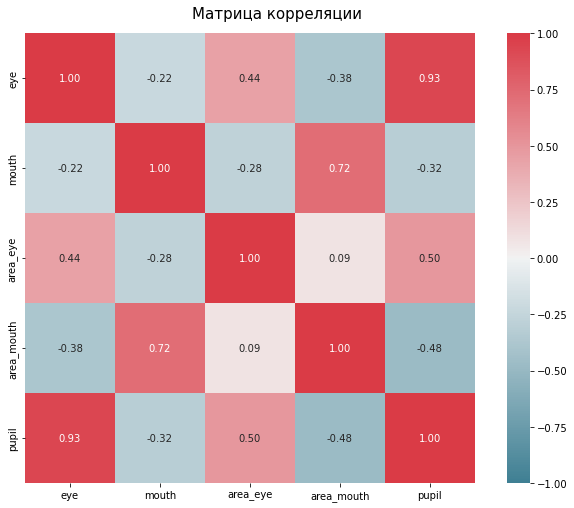

In [14]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.heatmap(cor, cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, 
            annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.title('Матрица корреляции', y=1.02, x=0.56, fontsize=15)

# Нормализация

In [27]:
data_norm = StandardScaler().fit_transform(data[num_cols])
df = pd.DataFrame(data=data_norm, columns=num_cols)
df[cat_cols]= data[cat_cols].values
df = pd.get_dummies(df, columns = cat_cols)

df

,eye,mouth,perimeter,area,pupil
0,0.768647,-0.244562,2.057325,2.914623,1.156528
1,0.149961,-0.182169,1.877484,1.711562,0.027527
2,0.137044,-0.205417,1.938398,1.812745,0.070290
3,0.152559,-0.251824,1.940639,1.826907,0.079407
4,0.192554,-0.244383,1.947741,1.851899,0.103011
...,...,...,...,...,...
1984,0.672086,-0.260002,0.285571,0.445630,0.411634
1985,0.597048,-0.277550,0.221256,0.315122,0.287871
1986,0.673839,-0.369491,0.122721,0.319465,0.439424
1987,0.676520,-0.307470,0.054810,0.248018,0.424148


In [28]:
about_data(df)

,columns,total missing,ration of missing
0,eye,0,0.0
1,mouth,0,0.0
2,perimeter,0,0.0
3,area,0,0.0
4,pupil,0,0.0


# Разбиение выборки

In [29]:
X = df
Y = data["label"]

In [30]:
ros = RandomOverSampler()
X_ros, Y_ros = ros.fit_resample(X, Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_ros, Y_ros, test_size=0.1, shuffle=True, random_state=101)

print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

X_train.head()

(1989, 5)
(1989,)
(221, 5)
(221,)


,eye,mouth,perimeter,area,pupil
508,0.408633,-0.195443,-0.244707,-0.035611,0.383175
2010,0.728281,-0.366774,-0.587448,-0.316754,0.392487
862,0.724638,-0.192056,0.446288,1.024805,1.069566
1144,0.462435,-0.309047,-0.532661,-0.487956,-0.015622
2111,0.717811,-0.233380,-0.683954,-0.356940,0.471317


# Методы

### Logistic regression

In [31]:
conf_mat = {}

In [32]:
lr_grid_params = {
    "penalty": ["l1", "l2", "elasticnet"],
    "solver": ["sag", "saga", "lbfgs"],
    "l1_ratio": [0.25, 0.5, 0.75],
    "max_iter": [100, 300, 500],
}

In [33]:
lr = LogisticRegression()
kfold = KFold(n_splits=3, random_state=42, shuffle=True)
lr_grid_cv = GridSearchCV(estimator=lr, param_grid=lr_grid_params, scoring='roc_auc', cv=kfold, verbose=2)

In [34]:
lr_grid_cv.fit(X_train, Y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END l1_ratio=0.25, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END l1_ratio=0.25, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END l1_ratio=0.25, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END l1_ratio=0.25, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END l1_ratio=0.25, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END l1_ratio=0.25, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END l1_ratio=0.25, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END l1_ratio=0.25, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END l1_ratio=0.25, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END l1_ratio=0.25, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END l1_ratio=0.25, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END l1_ratio=0.25, max_iter=100, 

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'l1_ratio': [0.25, 0.5, 0.75],
                         'max_iter': [100, 300, 500],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['sag', 'saga', 'lbfgs']},
             scoring='roc_auc', verbose=2)

In [36]:
# lr_best_params = lr_grid_cv.best_params_
lr_best_params ={'l1_ratio': 0.25, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'saga'}

print(lr_best_params)

{'l1_ratio': 0.25, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'saga'}


In [37]:
lr = LogisticRegression(**lr_best_params)
kfold = KFold(n_splits=3, random_state=7, shuffle= True)
scoring = {"AUC": "roc_auc", "F1": "f1", "Precision": "precision","Recall": "recall"}
cv_results = cross_validate(lr, X_train, Y_train, cv=kfold, scoring=scoring)

In [38]:
sorted(cv_results.keys())

['fit_time',
 'score_time',
 'test_AUC',
 'test_F1',
 'test_Precision',
 'test_Recall']

In [39]:
metrics = pd.DataFrame(index=['precision', 'recall', 'f1', 'roc-auc'])

metrics["lr"] = [
    cv_results["test_Precision"].mean(),
    cv_results["test_Recall"].mean(),
    cv_results["test_F1"].mean(),
    cv_results["test_AUC"].mean()
]
metrics

,lr
precision,0.902927
recall,0.829335
f1,0.863721
roc-auc,0.931704


In [40]:
lr.fit(X_train, Y_train)
lg_pred = lr.predict(X_test)
conf_mat["lr"] = [lg_pred, Y_test.values]
conf_mat["lr"]

[array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        0]),
 array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 1, 1, 1,

### Random tree

In [41]:
random_forest_parameters_grid = {
    'n_estimators': [200, 500, 1000],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9,10],
    'criterion' :['gini', 'entropy']
}

In [42]:
random_forest = RandomForestClassifier()
kfold = KFold(n_splits=3, random_state=42, shuffle=True)
random_forest_grid_cv = GridSearchCV(random_forest, random_forest_parameters_grid, scoring='roc_auc', cv=kfold, verbose=2)

In [43]:
random_forest_grid_cv.fit(X_train, Y_train)

Fitting 3 folds for each of 84 candidates, totalling 252 fits
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500; total time=   0.4s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500; total time=   0.4s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500; total time=   0.4s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000; total time=   0.9s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000; total time=   0.9s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000; total time=   0.8s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=200; total time=   

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 500, 1000]},
             scoring='roc_auc', verbose=2)

In [45]:
# random_forest_best_params = random_forest_grid_cv.best_params_
random_forest_best_params ={'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 1000}
print(random_forest_best_params)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 1000}


In [46]:
rf = RandomForestClassifier(**random_forest_best_params)
kfold = KFold(n_splits=3, random_state=7, shuffle= True)
scoring = {"AUC": "roc_auc", "F1": "f1", "Precision": "precision","Recall": "recall"}
cv_results = cross_validate(rf, X_train, Y_train, cv=kfold, scoring=scoring)

In [47]:
sorted(cv_results.keys())

['fit_time',
 'score_time',
 'test_AUC',
 'test_F1',
 'test_Precision',
 'test_Recall']

In [48]:
metrics["rf"] = [
    cv_results["test_Precision"].mean(),
    cv_results["test_Recall"].mean(),
    cv_results["test_F1"].mean(),
    cv_results["test_AUC"].mean()
]
metrics

,lr,rf
precision,0.902927,0.947500
recall,0.829335,0.955834
f1,0.863721,0.951598
roc-auc,0.931704,0.991172


In [49]:
rf.fit(X_train, Y_train)
rf_pred = rf.predict(X_test)
conf_mat["rf"] = [rf_pred, Y_test.values]
conf_mat["rf"]

[array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
        0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
        0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        0]),
 array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 1, 1, 1,

In [ ]:
# classification_report(Y_test.values,rf_pred)

### KNN

In [50]:
knn_grid_params = {
    "n_neighbors": np.arange(3, 7, 1),
    "algorithm": ["ball_tree", "kd_tree"],
    'p': [1, 2]
}

In [51]:
knn = KNeighborsClassifier()
kfold = KFold(n_splits=3, random_state=7, shuffle= True)
knn_grid_cv = GridSearchCV(estimator=knn, param_grid=knn_grid_params, scoring='roc_auc', verbose=2, cv=kfold)

In [52]:
X_train.head()

,eye,mouth,perimeter,area,pupil
508,0.408633,-0.195443,-0.244707,-0.035611,0.383175
2010,0.728281,-0.366774,-0.587448,-0.316754,0.392487
862,0.724638,-0.192056,0.446288,1.024805,1.069566
1144,0.462435,-0.309047,-0.532661,-0.487956,-0.015622
2111,0.717811,-0.233380,-0.683954,-0.356940,0.471317


In [53]:
knn_grid_cv.fit(X_train, Y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END ............algorithm=ball_tree, n_neighbors=3, p=1; total time=   0.0s
[CV] END ............algorithm=ball_tree, n_neighbors=3, p=1; total time=   0.0s
[CV] END ............algorithm=ball_tree, n_neighbors=3, p=1; total time=   0.0s
[CV] END ............algorithm=ball_tree, n_neighbors=3, p=2; total time=   0.0s
[CV] END ............algorithm=ball_tree, n_neighbors=3, p=2; total time=   0.0s
[CV] END ............algorithm=ball_tree, n_neighbors=3, p=2; total time=   0.0s
[CV] END ............algorithm=ball_tree, n_neighbors=4, p=1; total time=   0.0s
[CV] END ............algorithm=ball_tree, n_neighbors=4, p=1; total time=   0.0s
[CV] END ............algorithm=ball_tree, n_neighbors=4, p=1; total time=   0.0s
[CV] END ............algorithm=ball_tree, n_neighbors=4, p=2; total time=   0.0s
[CV] END ............algorithm=ball_tree, n_neighbors=4, p=2; total time=   0.0s
[CV] END ............algorithm=ball_tree, n_neig

GridSearchCV(cv=KFold(n_splits=3, random_state=7, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'n_neighbors': array([3, 4, 5, 6]), 'p': [1, 2]},
             scoring='roc_auc', verbose=2)

In [55]:
# knn_best_params = knn_grid_cv.best_params_
knn_best_params = {'algorithm': 'ball_tree', 'n_neighbors': 6, 'p': 1}
print(knn_best_params)

{'algorithm': 'ball_tree', 'n_neighbors': 6, 'p': 1}


In [56]:
knn = KNeighborsClassifier(**knn_best_params)
kfold = KFold(n_splits=3, random_state=7, shuffle=True)
scoring = {"AUC": "roc_auc", "F1": "f1", "Precision": "precision", "Recall": "recall"}
cv_results = cross_validate(knn, X_train, Y_train, cv=kfold, scoring=scoring)

In [57]:
metrics["knn"] = [
    cv_results["test_Precision"].mean(),
    cv_results["test_Recall"].mean(),
    cv_results["test_F1"].mean(),
    cv_results["test_AUC"].mean()
]
metrics

,lr,rf,knn
precision,0.902927,0.947500,0.955432
recall,0.829335,0.955834,0.930657
f1,0.863721,0.951598,0.942714
roc-auc,0.931704,0.991172,0.986054


In [58]:
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)
conf_mat["knn"] = [knn_pred, Y_test.values]
conf_mat["knn"]

[array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
        0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
        0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        0]),
 array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 1, 1, 1,

### Decision Tree

In [59]:
dtree_grid_params = {
    'max_leaf_nodes': list(range(50, 101)),
    'min_samples_split': [2, 3, 4, 5]
}

In [60]:
dtree = DecisionTreeClassifier()
kfold = KFold(n_splits=3, random_state=7, shuffle= True)
dtree_grid_cv = GridSearchCV(estimator=dtree, param_grid=dtree_grid_params, scoring='roc_auc', verbose=2, cv=kfold)

In [61]:
dtree_grid_cv.fit(X_train, Y_train)

Fitting 3 folds for each of 204 candidates, totalling 612 fits
[CV] END .............max_leaf_nodes=50, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=50, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=50, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=50, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=50, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=50, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=50, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=50, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=50, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=50, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=50, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=50, min_s

GridSearchCV(cv=KFold(n_splits=3, random_state=7, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': [50, 51, 52, 53, 54, 55, 56, 57, 58,
                                            59, 60, 61, 62, 63, 64, 65, 66, 67,
                                            68, 69, 70, 71, 72, 73, 74, 75, 76,
                                            77, 78, 79, ...],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='roc_auc', verbose=2)

In [63]:
# dtree_best_params = dtree_grid_cv.best_params_
dtree_best_params = {'max_leaf_nodes': 74, 'min_samples_split': 5}
print(dtree_best_params)

{'max_leaf_nodes': 74, 'min_samples_split': 5}


In [64]:
dtree = DecisionTreeClassifier(**dtree_best_params)
kfold = KFold(n_splits=3, random_state=7, shuffle= True)
scoring = {"AUC": "roc_auc", "F1": "f1", "Precision": "precision", "Recall": "recall"}
cv_results = cross_validate(dtree, X_train, Y_train, cv=kfold, scoring=scoring)

In [65]:
metrics["dt"] = [
    cv_results["test_Precision"].mean(),
    cv_results["test_Recall"].mean(),
    cv_results["test_F1"].mean(),
    cv_results["test_AUC"].mean()
]
metrics

,lr,rf,knn,dt
precision,0.902927,0.947500,0.955432,0.939371
recall,0.829335,0.955834,0.930657,0.940881
f1,0.863721,0.951598,0.942714,0.940087
roc-auc,0.931704,0.991172,0.986054,0.946353


In [66]:
dtree.fit(X_train, Y_train)
dtree_pred = dtree.predict(X_test)
conf_mat["dt"] = [dtree_pred, Y_test.values]
conf_mat["dt"]

[array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
        0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
        0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        0]),
 array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 1, 1, 1,

### XGBoost

In [70]:
xgb_params_grid = {'n_estimators': [600,800], 
                   'max_depth': [8,9], 
                   'eta': [0.1,0.01], 
                   'subsample': [0.7,0.8], 
                   'colsample_bytree': [0.7,0.8]}

In [71]:
xgb = xgboost.XGBClassifier()
kfold = KFold(n_splits=3, random_state=7, shuffle= True)
xgb_grid_cv = GridSearchCV(estimator=xgb, param_grid=xgb_params_grid, scoring='roc_auc', verbose=2, cv=kfold)

In [72]:
xgb_grid_cv.fit(X_train, Y_train, eval_metric='rmse')

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END colsample_bytree=0.7, eta=0.1, max_depth=8, n_estimators=600, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.7, eta=0.1, max_depth=8, n_estimators=600, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, eta=0.1, max_depth=8, n_estimators=600, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, eta=0.1, max_depth=8, n_estimators=600, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.7, eta=0.1, max_depth=8, n_estimators=600, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.7, eta=0.1, max_depth=8, n_estimators=600, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.7, eta=0.1, max_depth=8, n_estimators=800, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.7, eta=0.1, max_depth=8, n_estimators=800, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.7, eta=0.1, max_depth=8, n_estimators=800, subsample=0.7; total time=  

GridSearchCV(cv=KFold(n_splits=3, random_state=7, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                           

In [73]:
# xgb_best_params = dtree_grid_cv.best_params_
xgb_best_params = {'max_leaf_nodes': 74, 'min_samples_split': 5}
print(xgb_best_params)

{'max_leaf_nodes': 74, 'min_samples_split': 5}


In [74]:
xgb = xgboost.XGBClassifier(**xgb_best_params)
kfold = KFold(n_splits=3, random_state=7, shuffle= True)
scoring = {"AUC": "roc_auc", "F1": "f1", "Precision": "precision", "Recall": "recall"}
cv_results = cross_validate(xgb, X_train, Y_train, cv=kfold, scoring=scoring)

[02:03:25] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:576: 
Parameters: { "max_leaf_nodes", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:03:25] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:03:25] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:

In [75]:
metrics["xgb"] = [
    cv_results["test_Precision"].mean(),
    cv_results["test_Recall"].mean(),
    cv_results["test_F1"].mean(),
    cv_results["test_AUC"].mean()
]
metrics

,lr,rf,knn,dt,xgb
precision,0.902927,0.947500,0.955432,0.939371,0.955870
recall,0.829335,0.955834,0.930657,0.940881,0.947847
f1,0.863721,0.951598,0.942714,0.940087,0.951796
roc-auc,0.931704,0.991172,0.986054,0.946353,0.988848


In [76]:
xgb.fit(X_train, Y_train)
xgb_pred = xgb.predict(X_test)
conf_mat["xgb"] = [xgb_pred, Y_test.values]
conf_mat["xgb"]

[02:03:46] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:576: 
Parameters: { "max_leaf_nodes", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:03:46] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
        0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
        0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        0]),
 array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 1, 1, 1,

# Метрики

In [77]:
metrics.style.highlight_max(axis=1, color='lightgreen').highlight_min(axis=1, color='pink')

,lr,rf,knn,dt,xgb
precision,0.902927,0.947500,0.955432,0.939371,0.955870
recall,0.829335,0.955834,0.930657,0.940881,0.947847
f1,0.863721,0.951598,0.942714,0.940087,0.951796
roc-auc,0.931704,0.991172,0.986054,0.946353,0.988848
